In [1]:
from direct_integration import run_twa_bundle, compute_exact_expectation_value
import jax.numpy as jnp
import matplotlib.pyplot as plt
import jax

W0218 10:17:53.373950   13557 cuda_executor.cc:1802] GPU interconnect information not available: INTERNAL: NVML doesn't support extracting fabric info or NVLink is not used by the device.
W0218 10:17:53.376433   13500 cuda_executor.cc:1802] GPU interconnect information not available: INTERNAL: NVML doesn't support extracting fabric info or NVLink is not used by the device.


# Spin Test

In [2]:
trajectories = int(5e3)
t_max = 30 
t_grid = jnp.linspace(0, t_max, 5_000)
g = 1.0
b_field = jnp.array([0.0, 0.0, 0.0])  
initial_state = jnp.array([1.0, 0.0, 0.0]) 

key = jax.random.PRNGKey(2026)
keys = jax.random.split(key, trajectories)

In [3]:
test_cases = [
    # 1. The Standard Leggett-Caldeira Regime
    # Physics: Linear friction, transition between coherent and incoherent dynamics.
    {"name": "Ohmic Bath (s=1.0)", "s": 1.0, "kbt": 1.0, "eta": 0.5,"wc": 4.0},

    # 2. Super-Ohmic Vacuum Limit (Incomplete Decoherence)
    # Physics: Vanishing density of states at low freq. Spin-boson decoupling at T->0.
    {"name": "Super-Ohmic Vacuum (s=3.0)", "s": 3.0, "kbt": 0.01, "eta": 1.0, "wc": 5.0},

    # 3. Deep Sub-Ohmic Regime (Orthogonality Catastrophe)
    # Physics: Divergence of low-frequency modes (1/f noise). 
    # Causes rapid, often Gaussian, collapse of coherence (Anderson Orthogonality).
    {"name": "Deep Sub-Ohmic (s=0.25)", "s": 0.25, "kbt": 0.1, "eta": 0.2, "wc": 2.0},

    # 4. High-Temperature Classical Limit (Markovian Diffusion)
    # Physics: Thermal fluctuations dominate (kBT >> wc). Noise becomes white.
    # Recovers standard exponential decay (Lindblad/Redfield limit).
    {"name": "High-T Ohmic Limit (s=1.0)", "s": 1.0, "kbt": 5.0, "eta": 0.1, "wc": 10.0},

    # 5. Strong Non-Markovian Memory (Narrow Bandwidth)
    # Physics: Small cutoff frequency (wc) implies long bath correlation time.
    # Information flows back from bath to system (Revivals/Backflow).
    {"name": "Non-Markovian Ohmic (Low wc) ", "s": 1.0, "kbt": 0.5, "eta": 1.0, "wc": 0.5},
]

exact_results, twa_results = [], []

for case in test_cases:
    print(f"Running {case['name']}...")
    exact = compute_exact_expectation_value(t_grid, initial_state, case['eta'], case['wc'], 1.0, case['kbt'], g)
    exact_results.append(exact)

    twa = run_twa_bundle(keys, t_grid, case['eta'], case['wc'], 1.0, case['kbt'], b_field, g, initial_state, int(trajectories/1))
    twa_results.append(twa)

Running Ohmic Bath (s=1.0)...
1. Computing Memory Kernel...
2. Pre-computing Noise Transfer Matrix...
3. Starting Simulation: 5000 trajectories in 1 batches.


TWA Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Running Super-Ohmic Vacuum (s=3.0)...
1. Computing Memory Kernel...
2. Pre-computing Noise Transfer Matrix...
3. Starting Simulation: 5000 trajectories in 1 batches.


TWA Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Running Deep Sub-Ohmic (s=0.25)...
1. Computing Memory Kernel...
2. Pre-computing Noise Transfer Matrix...
3. Starting Simulation: 5000 trajectories in 1 batches.


TWA Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Running High-T Ohmic Limit (s=1.0)...
1. Computing Memory Kernel...
2. Pre-computing Noise Transfer Matrix...
3. Starting Simulation: 5000 trajectories in 1 batches.


TWA Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Running Non-Markovian Ohmic (Low wc) ...
1. Computing Memory Kernel...
2. Pre-computing Noise Transfer Matrix...
3. Starting Simulation: 5000 trajectories in 1 batches.


TWA Batches:   0%|          | 0/1 [00:00<?, ?it/s]

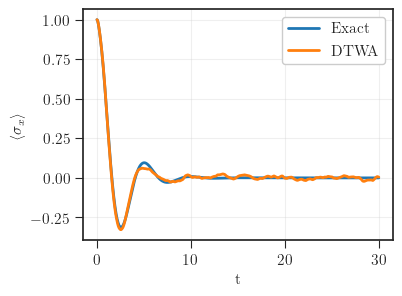

In [4]:
plt.style.use(['seaborn-v0_8-white', './style.mplstyle'])
fig, ax = plt.subplots(1, figsize=(4, 3))

plt.plot(t_grid, exact_results[0], linewidth = 2, label = 'Exact')
plt.plot(t_grid, twa_results[0][:, 0], linewidth = 2, label = 'DTWA' )
plt.legend()
plt.xlabel(r't')
plt.ylabel(r'$\langle \sigma_x \rangle$')
plt.grid(alpha = 0.3)

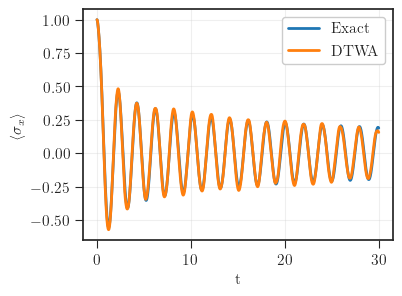

In [5]:
plt.style.use(['seaborn-v0_8-white', './style.mplstyle'])
fig, ax = plt.subplots(1, figsize=(4, 3))

plt.plot(t_grid, exact_results[1], linewidth = 2, label = 'Exact')
plt.plot(t_grid, twa_results[1][:, 0], linewidth = 2, label = 'DTWA' )
plt.legend()
plt.xlabel(r't')
plt.ylabel(r'$\langle \sigma_x \rangle$')
plt.grid(alpha = 0.3)

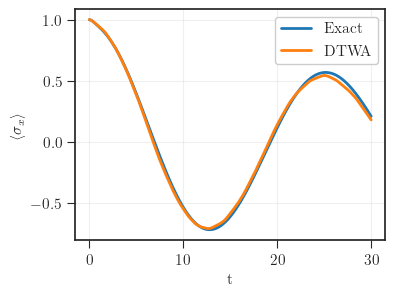

In [6]:
plt.style.use(['seaborn-v0_8-white', './style.mplstyle'])
fig, ax = plt.subplots(1, figsize=(4, 3))

plt.plot(t_grid, exact_results[2], linewidth = 2, label = 'Exact')
plt.plot(t_grid, twa_results[2][:, 0], linewidth = 2, label = 'DTWA' )
plt.legend()
plt.xlabel(r't')
plt.ylabel(r'$\langle \sigma_x \rangle$')
plt.grid(alpha = 0.3)

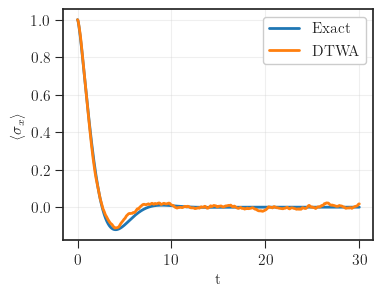

In [7]:
plt.style.use(['seaborn-v0_8-white', './style.mplstyle'])
fig, ax = plt.subplots(1, figsize=(4, 3))

plt.plot(t_grid, exact_results[3], linewidth = 2, label = 'Exact')
plt.plot(t_grid, twa_results[3][:, 0], linewidth = 2, label = 'DTWA' )
plt.legend()
plt.xlabel(r't')
plt.ylabel(r'$\langle \sigma_x \rangle$')
plt.grid(alpha = 0.3)

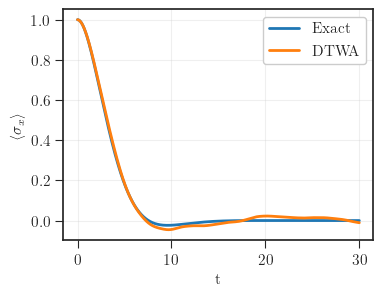

In [8]:
plt.style.use(['seaborn-v0_8-white', './style.mplstyle'])
fig, ax = plt.subplots(1, figsize=(4, 3))

plt.plot(t_grid, exact_results[4], linewidth = 2, label = 'Exact')
plt.plot(t_grid, twa_results[4][:, 0], linewidth = 2, label = 'DTWA' )
plt.legend()
plt.xlabel(r't')
plt.ylabel(r'$\langle \sigma_x \rangle$')
plt.grid(alpha = 0.3)